<div align="right">Python 2.7 Jupyter Notebook</div>

# Network Analysis using NetworkX

<div class="alert alert-warning">
<b>Note that this notebook contains advanced exercises applicable only to students who wish to deepen their understanding and qualify for bonus marks as part of the technical track.</b> You will be able to achieve 100% for this notebook by only completing exercises 1, 2, 10 and 11. Optional advanced exercises can be completed to qualify for bonus marks.
</div>

### Your completion of the notebook exercises will be graded based on your ability to:

> **Understand**: Does your pseudo-code and/or comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code, using the supplied examples, that perform the required functionality on supplied or generated data sets? 

> **Analyze**: Are you able to pick the relevant method, library or resolve specific stated questions?

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?


# Notebook introduction 

<img src="img\social_network_analysis.png", width=350, height=350>

The use of phone logs to infer relationships between volume of communication and other parameters has been an area of major research interest. In his seminal paper that was the first application of phone logs, Georg Zipf[1] investigated the influence of distance on communication. Many studies have since followed. Big data is characterized by significant increases in structured and unstructured data generated by mobile phones that are sampled and captured at high velocities. Its emergence, and the availability of computer processing technologies that are able to store and process these data sets efficiently, has made it possible to expand these studies in order to improve our understanding of human behavior with unprecedented resolution. Mobile phone data allows the inference of real social networks using call detail records, or CDRs (i.e. phone calls, short message service (SMS) and multimedia message (MMS) communications). These records are combined with GPS and WiFi datasets, browsing habits, application logs, and tower data to reveal a superposition of several social actors.

*The mobile nature of a mobile phone brings two advantages: first, the temporal patterns of communications [are] reflected in great detail due to the fact that the owner of the device usually carries the device with them and therefore the possibility of receiving the call exists in almost all cases, and second, the positioning data of a mobile phone allows tracking the displacements of its owner* [2].

Unlike the self-reported surveys - which are often subjective, limited to a very small subset of the population, and have been the only avenue used to gather data in the past - mobile phone CDRs contain information on real communications between millions of people at a time. Further enrichment from geolocation data that invariably is also collected alongside CDRs, as well as other external data that is available for the target segment (typically demographics), makes mobile phone CDRs an extremely rich and informative source of data for scientists and analysts. 

These interactions via mobile phones can be represented by a large network where nodes represent individuals, and links are drawn between individuals that have had a phone call, or exchanged messages or other media. 

The study of the structure of such networks provides useful insights into their organization, and can assist in, among others, improving communication infrastructure, understanding human behavior, traffic planning,and marketing initiatives. These applications are informed by the extraction and analysis of different kinds of information from large networks, including  [3]:

1. Associating every node with geographical coordinates. This can facilitate how geography influences the creation of links. More specifically, the intensity of communication between nodes decreases as a power of the geographical distance that separates them.

2. Studying how links in networks change over time, i.e. dynamical networks. In these networks, new nodes enter or leave the network and the strength of their connections rise and wane during the observation period. Of particular interest is the influence of time scales on the emergence of different structural properties of dynamical networks.

3. Detecting of communities in networks. Communities are groups of nodes that are densely connected to each other. 



**Load libraries and set global parameters for Matplotlib**

In [1]:
# Load the relevant libraries to your notebook. 
import csv                     # Process csv files.
import pandas as pd            # Processing csv files and manipulating the data frame.
import networkx as nx          # Graph-like object representation and manipulation module.
import matplotlib.pylab as plt # Plotting and data visualization module. 
                               # We use this for basic graph visualization.
import numpy as np             

# Set global parameters for plotting. 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# 1. Graph Structures Using NetworkX
In this notebook, you will continue working with the empirical dataset from the 'Friends and Family Study' utilized in Module 2. 

### 1.1 Data preparation

##### 1.1.1 Load the data into a dataframe
In this data, each record or row is typical of what is available in a CDR, i.e. the actors involved, the time of the start of the interaction, the duration of the interaction, who initiated it, and who was the recipient, among other details not included here (such as geolocation of the sender and receiver). 

In [2]:
# Read the CallLog.csv file, print the number of records loaded as well as the first 5 rows.
calls = pd.read_csv('../data/CallLog.csv')
print 'Loaded {0} rows of call log.'.format(len(calls))
calls.head()

Loaded 164905 rows of call log.


,participantID.A,participantID.B,local_time,type,duration,number.hash
0,sp10-01-02,NaN,2010-08-04 19:11:51,outgoing+,NaN,da83375fb3a7631f304a9471add44eeb19d3355
1,sp10-01-02,NaN,2010-08-04 18:49:26,outgoing+,NaN,da83375fb3a7631f304a9471add44eeb19d3355
2,sp10-01-53,sp10-01-04,2010-07-10 19:24:25,outgoing+,NaN,e729a096a6c30c9f523e56329b4cdc7993d83b00
3,sp10-01-53,sp10-01-04,2010-07-10 19:24:17,outgoing+,NaN,e729a096a6c30c9f523e56329b4cdc7993d83b00
4,sp10-01-53,NaN,2010-07-15 18:04:23,incoming+,NaN,ec5be5bbb1a719fc8c348ebbc577b99a61457575


##### 1.1.2 Row filtering

There are calls to outsiders in the data set, which can be seen in each entry where the participant's ID is NaN. These are not relevant to the current exercise and need to be removed before you proceed. Remove all calls where one of the participant ID's is missing.

In [3]:
# Initial number of records.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html
calls.shape[0]

164905

In [4]:
# Drop rows with NaN in either of the participant ID columns.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
calls = calls.dropna(subset = ['participantID.A', 'participantID.B'])
print '{} rows remaining after filtering out calls involving participants outside study population'.format(len(calls))
calls.head(n=5)

60518 rows remaining after filtering out calls involving participants outside study population


,participantID.A,participantID.B,local_time,type,duration,number.hash
2,sp10-01-53,sp10-01-04,2010-07-10 19:24:25,outgoing+,NaN,e729a096a6c30c9f523e56329b4cdc7993d83b00
3,sp10-01-53,sp10-01-04,2010-07-10 19:24:17,outgoing+,NaN,e729a096a6c30c9f523e56329b4cdc7993d83b00
6,sp10-01-53,sp10-01-52,2010-07-20 19:25:54,outgoing+,NaN,e22a3263eb0280fa601c400bc87e178a9ac5d3f7
26,sp10-01-01,sp10-01-53,2010-07-23 19:06:01,outgoing+,NaN,627e38ee55f5373a9bb5133558d623d7b8fe8ff6
29,sp10-01-01,sp10-01-02,2010-07-23 18:51:17,incoming+,NaN,6db007cb74cc8537b99e7d230c0452f4ba71d13e


##### 1.1.3 Column selection

For the purpose of this study, you should only focus on the social actors involved in the call interaction. Therefore, you can remove all columns not relevant to the network being analyzed.

In [5]:
# Create a new object containing only the columns of interest.
interactions = calls[['participantID.A', 'participantID.B']]

In [6]:
# Finally, let's also exclude rows where the actors are the same.

# Get a list of rows with different participants.
row_with_different_participants = interactions['participantID.A'] != interactions['participantID.B']

# Update "interactions" to contain only the rows identified. 
interactions = interactions[row_with_different_participants]
interactions.head()

,participantID.A,participantID.B
2,sp10-01-53,sp10-01-04
3,sp10-01-53,sp10-01-04
6,sp10-01-53,sp10-01-52
26,sp10-01-01,sp10-01-53
29,sp10-01-01,sp10-01-02


### 1.2 Creating graph objects with NetworkX
The call interactions captured above are directed, meaning that edges (u,v) and (v,u) are different.

First, let us try to capture the number of interactions between social actors, irrespective of who initiated the call. This will be done using an undirected graph. You will need to capture the number of interactions between any pair of actors with a link in the graph. Therefore, the graph object that needs to be created is a weighted undirected graph.

Use the Pandas dataframe objects as direct input into NetworkX to create graphs. The following demonstration illustrates how to build an unweighted, undirected graph.

In [7]:
# Create an unweighted undirected graph using the NetworkX's from_pandas_dataframe method with participantID.A as the source and participantID.B as the target.
G = nx.from_pandas_dataframe(interactions, source='participantID.A', target='participantID.B', create_using=nx.Graph())

Review basic information on your graph.

In [8]:
# Print the number of nodes in our network.
print 'The undirected graph object G has {0} nodes.'.format(G.number_of_nodes())

# Print the number of edges in our network.
print 'The undirected graph object G has {0} edges.'.format(G.number_of_edges())

The undirected graph object G has 129 nodes.
The undirected graph object G has 392 edges.



Let us print the neighbors of some of the nodes. Select to print neighbors for 5 of the nodes in no particular order.


In [9]:
# Print neighbors of max_nodes. 
max_nodes = 5
count = 0
for node in G.nodes():
    print node, G.neighbors(node)
    count = count + 1
    if count > max_nodes:
        break

fa10-01-78 ['fa10-01-77', 'fa10-01-62']
fa10-01-79 ['fa10-01-21', 'fa10-01-80', 'sp10-01-23', 'fa10-01-22']
sp10-01-52 ['fa10-01-82', 'fa10-01-81', 'fa10-01-44', 'sp10-01-01', 'sp10-01-02', 'sp10-01-53', 'sp10-01-43', 'fa10-01-72', 'fa10-01-04', 'sp10-01-26', 'fa10-01-43', 'fa10-01-71', 'sp10-01-33']
sp10-01-53 ['sp10-01-04', 'fa10-01-81', 'fa10-01-44', 'sp10-01-01', 'fa10-01-82', 'sp10-01-52', 'sp10-01-55', 'fa10-01-71', 'fa10-01-04']
fa10-01-74 ['sp10-01-49', 'fa10-01-83', 'fa10-01-80', 'sp10-01-41', 'sp10-01-40', 'sp10-01-42', 'sp10-01-45', 'fa10-01-73', 'sp10-01-46', 'fa10-01-14', 'sp10-01-39', 'fa10-01-04', 'sp10-01-23', 'sp10-01-35']
fa10-01-75 ['fa10-01-76', 'fa10-01-10', 'fa10-01-13']


Our original objective is to create a **weighted undirected** graph for call interactions, with the weights representing the number of interactions between two distinct participants. As illustrated above, you can use the "from_pandas_dataframe" to build an undirected graph between the pairs of actors by specifying the graph structure using a parameter to the argument "create_using=". To get the correct weights in the undirected graph, however, you will need to add the weight information separately. Unfortunately, you cannot rely on NetworkX as it cannot be used to control what data the undirected edges get. Below, is a description of how to add the necessary weights to the undirected graph.

The first task is to compute the number of interactions between participants. You will use pandas "group_by" dataframe method to achieve this.

In [10]:
# Get the count of interactions between participants and display the top 5 rows.
grp_interactions = pd.DataFrame(interactions.groupby(['participantID.A', 'participantID.B']).size(), 
                                columns=['counts']).reset_index()

grp_interactions.head(5)

,participantID.A,participantID.B,counts
0,fa10-01-01,fa10-01-02,870
1,fa10-01-01,fa10-01-05,1
2,fa10-01-01,fa10-01-17,3
3,fa10-01-02,fa10-01-01,1254
4,fa10-01-02,fa10-01-18,2


In [11]:
# Create a directed graph with an edge_attribute labeled counts.
g = nx.from_pandas_dataframe(grp_interactions, 
                             source='participantID.A', 
                             target='participantID.B', 
                             edge_attr='counts', 
                             create_using=nx.DiGraph())

# Instantiate a weighted undirected graph and populate edges list from the directed graph. 
# Set all the weights to 0 at this stage. We will add the correct weight information in the next step.
G = nx.Graph()
G.add_edges_from(g.edges_iter(), counts=0)

# Now iterate through each link from the directed graph, adding the attribute weight (counts) to the corresponding link in the undirected graph.
for u, v, d in g.edges_iter(data=True):
    G[u][v]['counts'] += d['counts']



Have a look at some of the edges and their corresponding weights.

In [12]:
# Print the first 5 edges with corresponding attribute data.
max_number_of_edges = 5
count = 0
for n1,n2,attr in G.edges(data=True): # unpacking
    print n1,n2,attr
    count = count + 1
    if count > max_number_of_edges:
        break     

fa10-01-78 fa10-01-77 {'counts': 328}
fa10-01-78 fa10-01-62 {'counts': 1}
fa10-01-79 fa10-01-21 {'counts': 50}
fa10-01-79 fa10-01-80 {'counts': 351}
fa10-01-79 fa10-01-22 {'counts': 60}
fa10-01-79 sp10-01-23 {'counts': 1197}


You can verify whether you got your 'magic' workaround to work using the following:

In [13]:
# Verify our attribute data is correct using a selected (u,v) pair from the data.
u = 'fa10-01-77'
v = 'fa10-01-78'
print 'The total # of undirected call interactions between {0} and {1} is {2}'.format(u,
                                                                                 v,
                                                                                 G.get_edge_data(v,u)['counts'])

The total # of undirected call interactions between fa10-01-77 and fa10-01-78 is 328


In [14]:
# Compare our dataset to the interactions dataset.
is_uv_pair = ((interactions['participantID.A'] == u) & (interactions['participantID.B'] == v)) 
is_vu_pair = ((interactions['participantID.A'] == v) & (interactions['participantID.B'] == u))
print 'The total # of undirected call interactions between {0} and {1} is {2}'.format(u,
                                                                      v, 
                                                                      interactions[is_uv_pair | is_vu_pair].shape[0])

The total # of undirected call interactions between fa10-01-77 and fa10-01-78 is 328


From the above comparison, it can be said with confidence that your graph object captures the interactions as expected.

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>

### Instructions
> Verify that the number of call interactions between participant 'sp10-01-52' and participant 'fa10-01-81' captured in your graph equals what you would have calculated directly from the data. You can do this by repeating the two steps demonstrated in the preceding cells to verify attribute data and the interactions dataset.


In [15]:
# Your solution here:
u = 'sp10-01-52'
v = 'fa10-01-81'

In [16]:
# Verify our attribute data is correct using a selected (u,v) pair from the data.
print 'The total # of undirected call interactions between {0} and {1} is {2}'.format(u,v,G.get_edge_data(v,u)['counts'])

The total # of undirected call interactions between sp10-01-52 and fa10-01-81 is 31


In [17]:
# Compare our dataset to the interactions dataset.
is_uv_pair = ((interactions['participantID.A'] == u) & (interactions['participantID.B'] == v)) 
is_vu_pair = ((interactions['participantID.A'] == v) & (interactions['participantID.B'] == u))
print 'The total # of undirected call interactions between {0} and {1} is {2}'.format(u,
                                                                      v, 
                                                                      interactions[is_uv_pair | is_vu_pair].shape[0])

The total # of undirected call interactions between sp10-01-52 and fa10-01-81 is 31


<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

### 1.3 Graph visualization
The next step is to visualize the graph object. Note that NetworkX is not primarily a graph drawing package, but provides basic drawing capabilities using matplotlib. More advanced graph visualization packages can be used, however, these are outside the scope of this course.

Graph visualization is not a well-defined problem with a unique solution. Depending on what structures in the graph object are of interest, several layout algorithms exist that can be used to optimize node positioning for display visualization. 

> [NetworkX documentation](https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html) includes the following statement:

> *Proper graph visualization is hard, and we highly recommend that people visualize their graphs with tools dedicated to that task. Notable examples of dedicated and fully-featured graph visualization tools are Cytoscape, Gephi, Graphviz and, for LaTeX typesetting, PGF/TikZ.*

The spring_layout algorithm for node positioning is used as the default in this course, as considering other possibilities may distract from the core objectives. Below is a visual display of our weighted undirected graph that was created using the call data. 

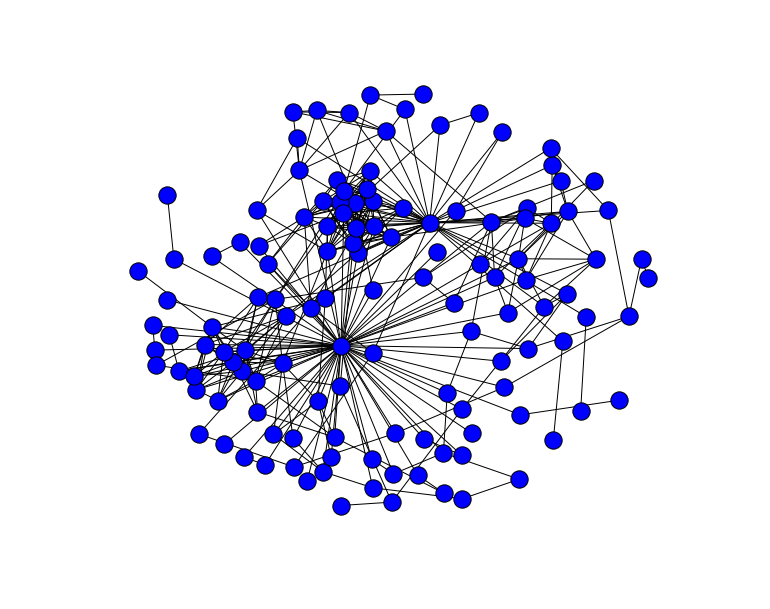

In [18]:
# Visualize the graph object using spring_layout for node positioning.
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, node_color='blue')

<br>
<div class="alert alert-info">
<b>Exercise 2 Start.</b>
</div>

### Instructions 

> What can you tell about these networks and the types of interactions they capture?

> - Please provide written feedback (a sentence or two) based on your insights of the Call log data in the markdown cell below (see hint below for what you should be looking for).

> **Hints**:
> - Does there appear to be some structure in the graph or do the connections between nodes appear random, i.e., do some nodes have more links than others?

There appears to be some structure in the graph. The central nodes have more connections than the nodes on the edge.

<br>
<div class="alert alert-info">
<b>Exercise 2 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

<br>
<div class="alert alert-info">
<b>Exercise 3 [Advanced exercise for bonus marks] Start.</b>
</div>

### Instructions

> You will now need to reproduce the steps above for SMS records.

> - Make sure that you use different variables when loading the datasets, and remember that you can always insert additional cells in the notebook should you prefer to break up steps or perform additional investigations.

> - It is good practice to make clear comments (start the line with #) in your code when sharing your work or if you need to review it at a later stage. Make sure that you add notes to enable your tutor to understand your thinking process.


> **Hints**:
> 1. Load "SMSLog.csv" from the data folder in your home directory into a variable 'sms'.
> 2. Create a weighted undirected graph using the number of interactions between participants as weights.
> 3. Assign the graph to variable H (do not overwrite G as you will still use it below).
> 4. Ignore all interactions where one of the parties is missing or unknown (i.e. NaN).
> 5. Disregard any self-interactions.
> 6. Display a visualization of the obtained graph network using the spring_layout algorithm for node positioning.
> 7. The number of cells below are only indicative. You can insert additional cells as required.

In [20]:
# Load "SMSLog.csv" from the data folder in your home directory into a variable 'sms'.
sms = pd.read_csv('../data/SMSLog.csv')

In [21]:
# Ignore all interactions where one of the parties is missing or unknown (i.e. NaN).
sms = sms.dropna(subset = ['participantID.A', 'participantID.B'])
# Create a new object containing only the columns of interest.
interactions_H = sms[['participantID.A', 'participantID.B']]

In [22]:
# Disregard any self-interactions.
row_with_different_participants_H = interactions_H['participantID.A'] != interactions_H['participantID.B']
# Update "interactions" to contain only the rows identified. 
interactions_H = interactions_H[row_with_different_participants_H]

In [23]:
# Create a weighted undirected graph using the number of interactions between participants as weights.
# Create an unweighted undirected graph using the NetworkX's from_pandas_dataframe method with participantID.A as the source and participantID.B as the target.
H = nx.from_pandas_dataframe(interactions_H, source='participantID.A', target='participantID.B', create_using=nx.Graph())
# Get the count of interactions between participants.
grp_interactions_H = pd.DataFrame(interactions_H.groupby(['participantID.A', 'participantID.B']).size(), 
                                columns=['counts']).reset_index()
# Create a directed graph with an edge_attribute labeled counts.
h = nx.from_pandas_dataframe(grp_interactions_H, 
                             source='participantID.A', 
                             target='participantID.B', 
                             edge_attr='counts', 
                             create_using=nx.DiGraph())

In [24]:
# Assign the graph to variable H.
# Set all the weights to 0 at this stage. We will add the correct weight information in the next step.
H = nx.Graph()
H.add_edges_from(h.edges_iter(), counts=0)
# Now iterate through each link from the directed graph, adding the attribute weight (counts) to the corresponding link in the undirected graph.
for u, v, d in h.edges_iter(data=True):
    H[u][v]['counts'] += d['counts']

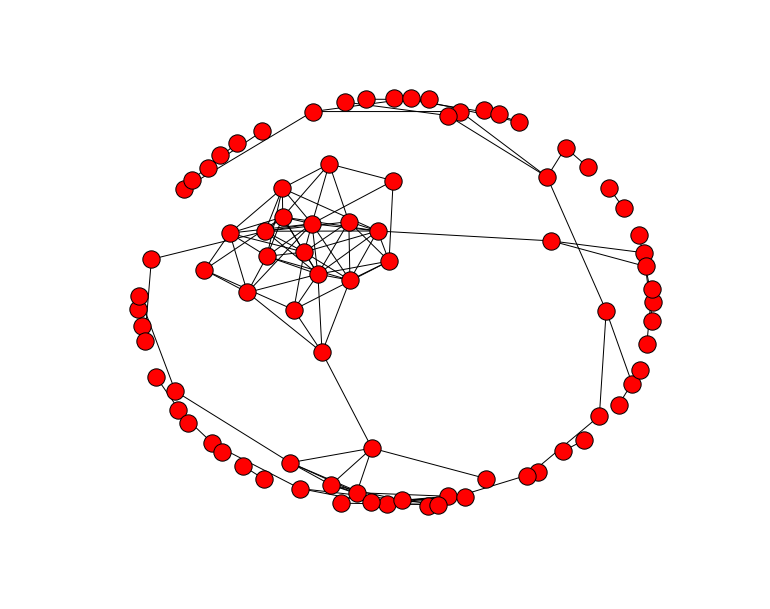

In [25]:
# Display a visualization of the obtained graph network using the spring_layout algorithm for node positioning.
layout = nx.spring_layout(H)
nx.draw(H, pos=layout, node_color='red')

<br>
<div class="alert alert-info">
<b>Exercise 3 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 2. Computing and visualizing network characteristics
### 2.1 Degree distribution
The degree of a node in a network is the number of connections it has to other nodes, and the degree distribution is the probability distribution of these degrees over the whole network. Specifically, the degree distribution (also referred to as the neighbor distribution) $p(k)$ is the probability that a randomly chosen node has  $k$ connections (or neighbors).

#### 2.1.1 Degree distribution histogram
A degree distribution histogram is a plot of the frequency of occurrence of the number of connections or neighbors based on the relationships (edges) between entities (nodes) as represented by a graph object.

Continuing with the call data, graph G, from the preceding sections, you will now compute the degree, and plot the degree distribution histogram.

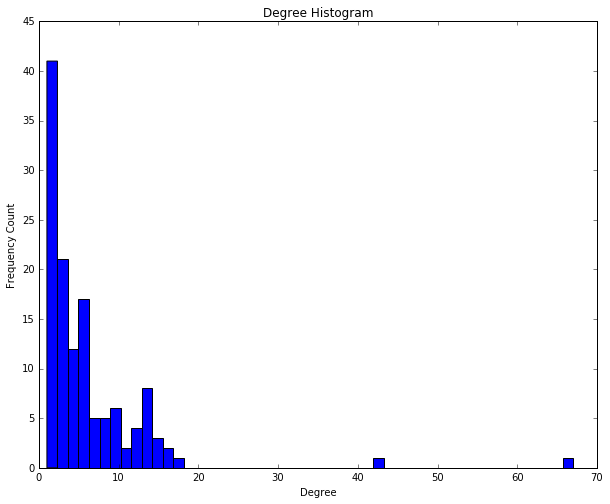

In [26]:
# Plot the degree distribution histogram.
degrees  = G.degree() # output is a dict node:degree
out = plt.hist(degrees.values(), bins=50)
plt.title("Degree Histogram")
plt.ylabel("Frequency Count")
plt.xlabel("Degree")

#### 2.1.2 Logarithmic plot of the degree distribution

In many cases, the histogram distribution is best represented using a loglog plot.

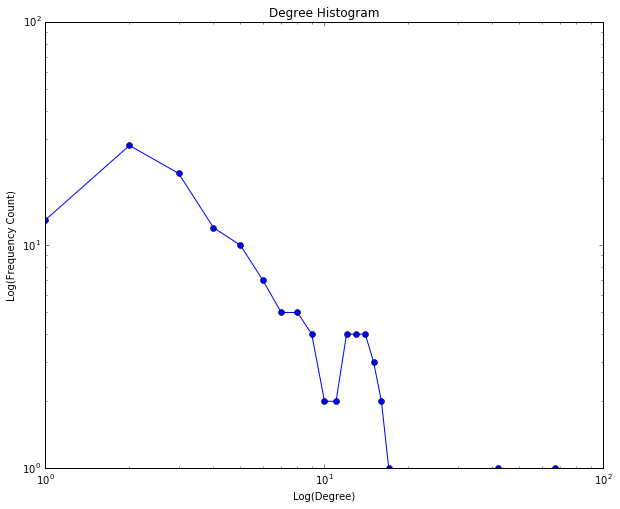

In [27]:
# Logarithmic plot of the degree distribution.
values = sorted(set(degrees.values())) 
hist = [degrees.values().count(x) for x in values]
out = plt.loglog(values, hist, marker='o')
plt.title("Degree Histogram")
plt.ylabel("Log(Frequency Count)")
plt.xlabel("Log(Degree)")

### 2.2 Node centrality
Centrality measures provide relative measures of importance in a network. There are many different centrality measures and each measures a different type of importance. In the video lectures, you were introduced to the following centrality measures:

1. **Degree Centrality:** Number of connections. An important node is involved in a large number of interactions.

2. **Closeness Centrality:** Average length of the shortest paths between a specific node and all other nodes in the graph. An important node is typically close to, and can communicate quickly with, the other nodes in the network.

3. **Betweenness Centrality:** Measures the extent to which a particular vertex lies on the path between all other vertices. An important node will lie on a high proportion of paths between other nodes in the network.

4. **Eigenvector Centrality:** An important node is connected to important neighbors.  


NetworkX provides functionality to evaluate these metrics for graph objects, which will be described in the next section.

#### 2.2.1 Degree Centrality

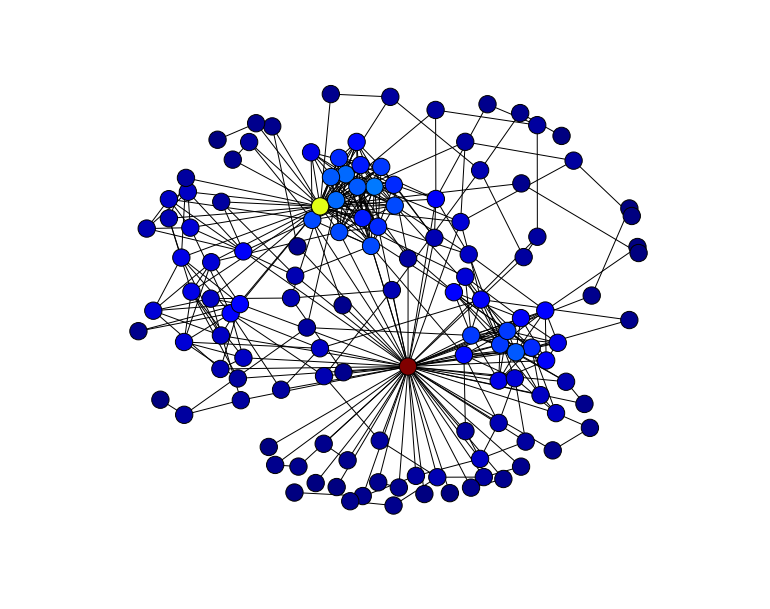

In [28]:
# Plot degree centrality.
call_degree_centrality = nx.degree_centrality(G)
colors =[call_degree_centrality[node] for node in G.nodes()]
layout = nx.spring_layout(G)
nx.draw(G, layout, node_color=colors)

The visual above uses different colors on nodes to highlight their degree centrality, with dark blue nodes having a low value, and the red-brown color indicating the highest centrality value in the network. Although it is possible to add label information on the nodes, it can become too busy and, therefore, difficult to read the visual. In the following example, the data is arranged according to the degree centrality measure such that the node with the highest degree centrality measure appears at the top, followed by the node with the next highest degree centrality measure, and so forth (that is in descending order). 

In [29]:
# Arrange in descending order of centrality and return the result as a tuple, i.e. (participant_id, deg_centrality).
t_call_deg_centrality_sorted = sorted(call_degree_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas datatframe.
df_call_deg_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_call_deg_centrality_sorted], 
                                             columns=['participantID', 'deg.centrality'])

Note that in NetworkX, the degree centrality values are *normalized* by dividing by the maximum possible degree in a simple graph ($n-1$) where $n$ is the number of nodes in the graph. To get integer values, when required, the computed degree centrality values are multiplied by ($n-1$).

You can print the nodes with the highest degree centrality measure using head().

In [30]:
# Top 5 participants with the highest degree centrality measure.
df_call_deg_centrality_sorted.head()

,participantID,deg.centrality
0,fa10-01-04,0.523438
1,fa10-01-13,0.328125
2,sp10-01-49,0.132812
3,sp10-01-31,0.125000
4,sp10-01-41,0.125000


Here are some immediate questions to ask:
1. How many unique actors are associated with each of the five participants with the highest degree centrality measure?
2. How many total call interactions are associated with each of these five participants with the highest degree centrality measure?

These questions are answered below. 

In [31]:
# Number of unique actors associated with each of the five participants with highest degree centrality measure.
for node in df_call_deg_centrality_sorted.head().participantID:
    print 'Node: {0}, \t num_neighbors: {1}'.format(node, len(G.neighbors(node)))

Node: fa10-01-04, 	 num_neighbors: 67
Node: fa10-01-13, 	 num_neighbors: 42
Node: sp10-01-49, 	 num_neighbors: 17
Node: sp10-01-31, 	 num_neighbors: 16
Node: sp10-01-41, 	 num_neighbors: 16


In [32]:
# Total call interactions are associated with each of these five participants with highest degree centrality measure.
for node in df_call_deg_centrality_sorted.head().participantID:
    outgoing_call_interactions = interactions['participantID.A']==node
    incoming_call_interactions = interactions['participantID.B']==node
    all_call_int = interactions[outgoing_call_interactions | incoming_call_interactions]
    print 'Node: {0}, \t total number of calls: {1}'.format(node, all_call_int.shape[0])

Node: fa10-01-04, 	 total number of calls: 1801
Node: fa10-01-13, 	 total number of calls: 2799
Node: sp10-01-49, 	 total number of calls: 1239
Node: sp10-01-31, 	 total number of calls: 716
Node: sp10-01-41, 	 total number of calls: 969


#### 2.2.2 Closeness centrality

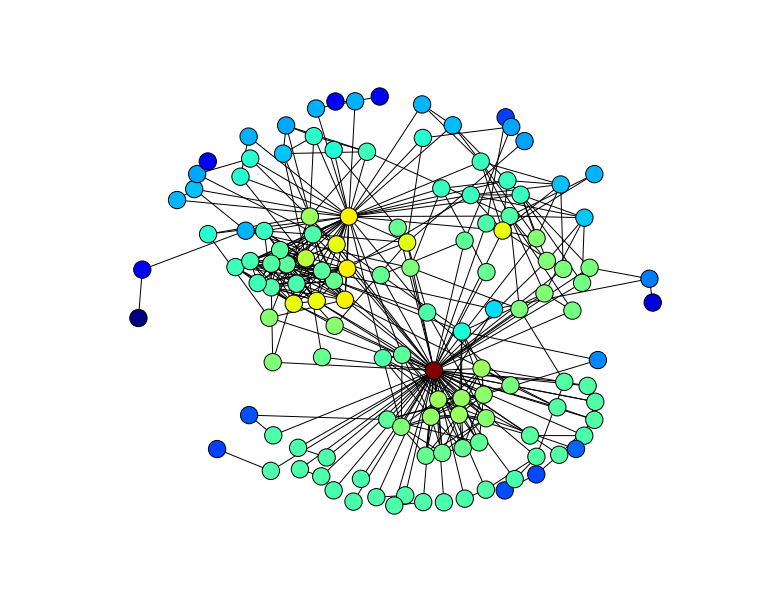

In [33]:
# Plot closeness centrality.
call_closeness_centrality = nx.closeness_centrality(G)
colors = [call_closeness_centrality[node] for node in G.nodes()]
nx.draw(G, pos=nx.spring_layout(G),node_color=colors)

Nodes with the highest closeness centrality are depicted with a red-brown color, whereas those with the least are depicted in blue. To propagate information quickly in the network, one would need to involve nodes with a high closeness centrality measure.

Below, you will identify these nodes explicitly and store the data in a separate dataframe.

In [34]:
# Arrange participants according to closeness centrality measure, in descending order. 
# Return the result as a tuple, i.e. (participant_id, cl_centrality).
t_call_clo_centrality_sorted = sorted(call_closeness_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas dataframe.
df_call_clo_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_call_clo_centrality_sorted], 
                                             columns=['participantID', 'clo.centrality']) 

In [35]:
# Top 5 participants with the highest closeness centrality measure.
df_call_clo_centrality_sorted.head()

,participantID,clo.centrality
0,fa10-01-04,0.624390
1,fa10-01-13,0.477612
2,sp10-01-08,0.477612
3,sp10-01-45,0.475836
4,sp10-01-48,0.468864


<br>
<div class="alert alert-info">
<b>Exercise 4 [Advanced exercise for bonus marks] Start.</b>
</div>

### Instructions

> In section 2.2.1, Degree centrality, some basic questions about the graph were answered. Use similar steps to answer the following questions for SMS records from exercise 2:
1. Identify the top 5 nodes associated with the highest closeness centrality measure.
2. How many sms interactions are each of these involved in from the provided and cleaned dataset?

In [42]:
# Number of unique actors associated with each of the five participants with highest closeness centrality measure.
sms_closeness_centrality = nx.closeness_centrality(H)

# Arrange participants according to closeness centrality measure, in descending order. 
# Return the result as a tuple, i.e. (participant_id, cl_centrality).
t_sms_clo_centrality_sorted = sorted(sms_closeness_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas dataframe.
df_sms_clo_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_sms_clo_centrality_sorted], 
                                             columns=['participantID', 'clo.centrality']) 

# Top 5 participants with the highest closeness centrality measure.
df_sms_clo_centrality_sorted.head()


,participantID,clo.centrality
0,sp10-01-39,0.177916
1,sp10-01-46,0.176205
2,sp10-01-45,0.166594
3,fa10-01-38,0.163619
4,sp10-01-44,0.159350


In [43]:
# Total SMS interactions associated with each of these five participants with highest closeness centrality measure.
for node in df_sms_clo_centrality_sorted.head().participantID:
    outgoing_sms_interactions = interactions_H['participantID.A']==node
    incoming_sms_interactions = interactions_H['participantID.B']==node
    all_sms_int = interactions_H[outgoing_sms_interactions | incoming_sms_interactions]
    print 'Node: {0}, \t total number of sms: {1}'.format(node, all_sms_int.shape[0])


Node: sp10-01-39, 	 total number of sms: 6473
Node: sp10-01-46, 	 total number of sms: 1818
Node: sp10-01-45, 	 total number of sms: 786
Node: fa10-01-38, 	 total number of sms: 271
Node: sp10-01-44, 	 total number of sms: 1412


<br>
<div class="alert alert-info">
<b>Exercise 4 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 2.2.3 Betweenness centrality

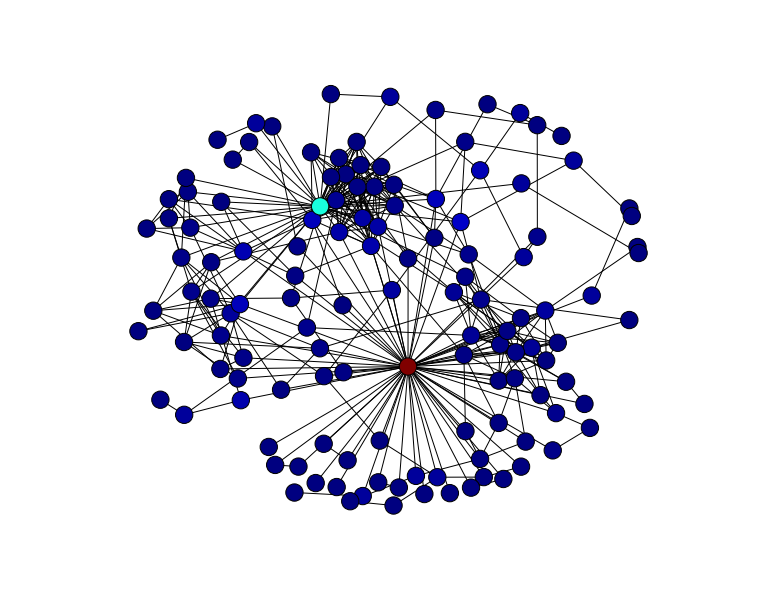

In [39]:
# Plot betweenness centrality.
call_betweenness_centrality = nx.betweenness_centrality(G)
colors =[call_betweenness_centrality[node] for node in G.nodes()]
nx.draw(G, layout, node_color=colors)

Betweenness centrality is a measure of the influence a node has over the spread of information through the network. Specifically, these nodes are strategically positioned and dictate information flows in the across the network. In the visual above, two nodes, one in cyan color and the other in a red-brown color are highlighted as the key nodes that govern information flow in the network. You can explicitly identify these nodes by re-arranging the data in order of descending betweenness centrality measure.

In [40]:
# Arrange participants according to betweenness centrality measure, in descending order. 
# Return the result as a tuple, i.e. (participant_id, btn_centrality) 
t_call_btn_centrality_sorted = sorted(call_betweenness_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas datatframe.
df_call_btn_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_call_btn_centrality_sorted], 
                                             columns=['participantID', 'btn.centrality']) 

In [41]:
# Top 5 participants with the highest betweenness centrality measure.
df_call_btn_centrality_sorted.head()

,participantID,btn.centrality
0,fa10-01-04,0.651025
1,fa10-01-13,0.248733
2,fa10-01-76,0.042644
3,fa10-01-62,0.035216
4,fa10-01-74,0.033967


<br>
<div class="alert alert-info">
<b>Exercise 5 [Advanced exercise for bonus marks] Start.</b>
</div>

### Instructions
> 1. Identify the top 5 nodes associated with the highest betweenness centrality measure for the SMS dataset.  

> 2. How many sms interactions are each of these involved in from the provided and cleaned dataset?

In [44]:
# Number of unique actors associated with each of the five participants with highest betweenness centrality measure.
sms_betweenness_centrality = nx.betweenness_centrality(H)

# Arrange participants according to betweenness centrality measure, in descending order. 
# Return the result as a tuple, i.e. (participant_id, btn_centrality) 
t_sms_btn_centrality_sorted = sorted(sms_betweenness_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas datatframe.
df_sms_btn_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_sms_btn_centrality_sorted], 
                                             columns=['participantID', 'btn.centrality']) 

# Top 5 participants with the highest betweenness centrality measure.
df_sms_btn_centrality_sorted.head()

,participantID,btn.centrality
0,fa10-01-38,0.109903
1,sp10-01-46,0.108421
2,sp10-01-39,0.053644
3,fa10-01-82,0.044397
4,sp10-01-49,0.043746


In [45]:
# Total SMS interactions associated with each of these five participants with highest betweenness centrality measure.
for node in df_sms_btn_centrality_sorted.head().participantID:
    outgoing_sms_interactions = interactions_H['participantID.A']==node
    incoming_sms_interactions = interactions_H['participantID.B']==node
    all_sms_int = interactions_H[outgoing_sms_interactions | incoming_sms_interactions]
    print 'Node: {0}, \t total number of sms: {1}'.format(node, all_sms_int.shape[0])


Node: fa10-01-38, 	 total number of sms: 271
Node: sp10-01-46, 	 total number of sms: 1818
Node: sp10-01-39, 	 total number of sms: 6473
Node: fa10-01-82, 	 total number of sms: 436
Node: sp10-01-49, 	 total number of sms: 3346


<br>
<div class="alert alert-info">
<b>Exercise 5 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

#### 2.2.4 Eigenvector centrality

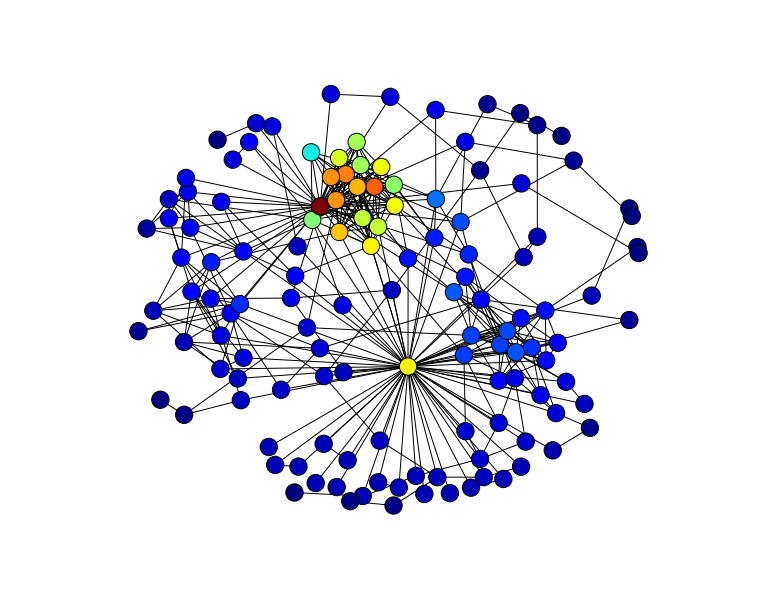

In [46]:
# Plot eigenvector centrality.
call_eigenvector_centrality = nx.eigenvector_centrality(G)
colors = [call_eigenvector_centrality[node] for node in G.nodes()]
nx.draw(G, layout, node_color=colors)

The eigenvector centrality measure is based on the idea that a node is important if it is linked to by other important nodes. Eigenvector centrality characterizes the "global" (as opposed to "local") prominence of a vertex in a graph. Google’s pagerank algorithm is a variation of eigenvector centrality. As before, it is best to explicitly identify the nodes with the highest eigenvector centrality in order to better understand their properties.

In [47]:
# Arrange participants according to eigenvector centrality measure, in descending order. 
# Return the result as a tuple, i.e. (participant_id, eig_centrality).
t_call_eig_centrality_sorted = sorted(call_eigenvector_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas datatframe.
df_call_eig_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_call_eig_centrality_sorted], 
                                             columns=['participantID', 'eig.centrality']) 

In [48]:
# Top 5 participants with the highest eigenvector centrality measure. 
df_call_eig_centrality_sorted.head()

,participantID,eig.centrality
0,fa10-01-13,0.326465
1,sp10-01-49,0.263320
2,sp10-01-41,0.253733
3,sp10-01-31,0.245286
4,sp10-01-39,0.245269


<br>
<div class="alert alert-info">
<b>Exercise 6 [Advanced exercise for bonus marks] Start.</b>
</div>

### Instructions
> 1. Identify the top 5 nodes associated with the highest eigenvector centrality measure for SMS records. 

> 2. How many sms interactions are each of these involved in from the provided and cleaned dataset?

In [49]:
# Number of unique actors associated with each of the five participants with highest eigenvector centrality measure.
sms_eigenvector_centrality = nx.eigenvector_centrality(H)

# Arrange participants according to eigenvector centrality measure, in descending order. 
# Return the result as a tuple, i.e. (participant_id, eig_centrality).
t_sms_eig_centrality_sorted = sorted(sms_eigenvector_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas datatframe.
df_sms_eig_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_sms_eig_centrality_sorted], 
                                             columns=['participantID', 'eig.centrality']) 
# Top 5 participants with the highest eigenvector centrality measure. 
df_sms_eig_centrality_sorted.head()



,participantID,eig.centrality
0,sp10-01-38,0.351503
1,sp10-01-39,0.346816
2,sp10-01-41,0.321863
3,sp10-01-07,0.307710
4,sp10-01-49,0.302168


In [50]:
# Total SMS interactions associated with each of these five participants with highest eigenvector centrality measure.
for node in df_sms_eig_centrality_sorted.head().participantID:
    outgoing_sms_interactions = interactions_H['participantID.A']==node
    incoming_sms_interactions = interactions_H['participantID.B']==node
    all_sms_int = interactions_H[outgoing_sms_interactions | incoming_sms_interactions]
    print 'Node: {0}, \t total number of sms: {1}'.format(node, all_sms_int.shape[0])


Node: sp10-01-38, 	 total number of sms: 5414
Node: sp10-01-39, 	 total number of sms: 6473
Node: sp10-01-41, 	 total number of sms: 713
Node: sp10-01-07, 	 total number of sms: 2287
Node: sp10-01-49, 	 total number of sms: 3346


<br>
<div class="alert alert-info">
<b>Exercise 6 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

### 2.3 Comparing the connectedness measures

<img src="img\social_network_analysis_centrality.png", width=1050, height=450>

Based on the above exercises, you will have a sense that the centrality metrics are similar regarding how they rank important nodes, since a limited number of nodes are common across different metrics. However, they are also different as they do not always return the same nodes. In this section, some analysis tools are provided that assist in comparing these metrics. The figure above shows a demonstration and comparison of what some of these metrics actually capture. Here, node X always has the highest centrality measure, although it measures different behaviors in each case.

Below, you are provided with a plotting function that accepts two objects containing different (or the same) centrality measures as python dicts. The metrics you found above are all in the form of python dict objects and can be used as is. The function plots a scatter plot of the metrics against each other, so as to compare the centrality measures.

> **Note to non-technical students**:

> You do not need to understand the function and its syntax. It is included for advanced students and to make it possible to demonstrate the concepts in this section to you more easily. All you need to do is **execute the cell below**.

In [51]:
# Execute this cell to define a function that produces a scatter plot.
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    '''
    The function accepts two dicts containing centrality measures and outputs a scatter plot
    showing the relationship between the two centrality measures
    '''
    # Create figure and drawing axis.
    fig = plt.figure(figsize=(7,7))
    #ax1 = fig.add_subplot(111)
    # Set up figure and axis.
    fig, ax1 = plt.subplots(figsize=(8,8))
    # Create items and extract centralities.
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    ax1.scatter(xdata, ydata)

    if line:
        # Use NumPy to calculate the best fit.
        slope, yint = np.polyfit(xdata,ydata,1)
        xline = plt.xticks()[0]
        yline = map(lambda x: slope*x+yint,xline)
        ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits.
        plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
        plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
        # Add labels.
        ax1.set_title(title)
        ax1.set_xlabel(xlab)
        ax1.set_ylabel(ylab)


#### 2.3.1 Compare betweenness centrality and degree centrality
We use a scatter plot to visually compare the betweenness centrality and degree centrality.

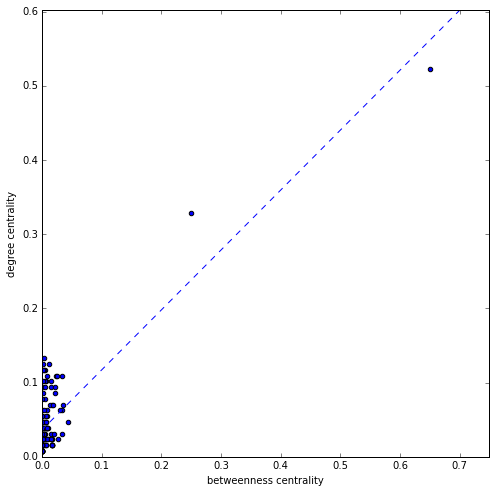

In [57]:
# Let us compare call_betweenness_centrality, call_degree_centrality.
centrality_scatter(call_betweenness_centrality, call_degree_centrality, 
                   xlab='betweenness centrality',ylab='degree centrality',line=True)

The distribution of the points in the scatter plot above is not very clear due to the effect of the two nodes with very high centrality values. To better understand the distribution of other nodes, we remove these nodes from the dataset and redraw the scatter plot.

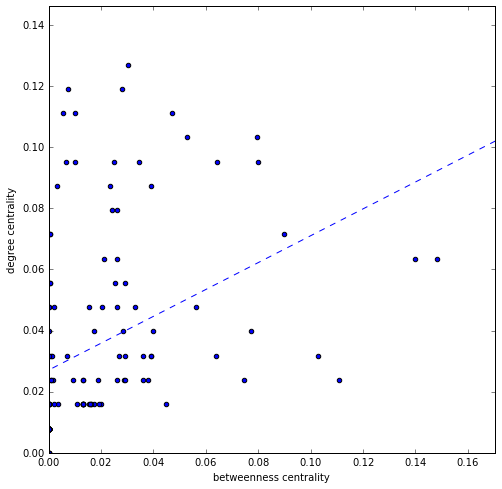

In [58]:
# Make a (deep) copy of the graph; we work on the copy.
g2 = G.copy()

# Remove the 2 nodes with the highest centrality meaures as discussed above 
g2.remove_node('fa10-01-04')
g2.remove_node('fa10-01-13')

# Recompute the centrality measures.
betweenness2 = nx.betweenness_centrality(g2)
centrality2 = nx.degree_centrality(g2)

# Scatter plot comparison of the recomputed measures.
centrality_scatter(betweenness2, centrality2, 
                   xlab='betweenness centrality',ylab='degree centrality',line=True)

#### 2.3.2 Compare betweenness centrality and eigenvector centrality

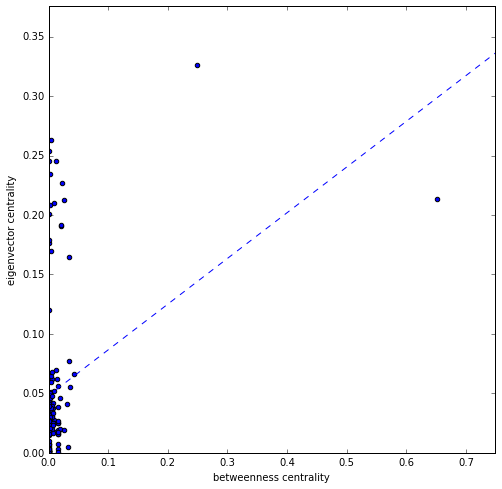

In [54]:
# Let us compare call_betweenness_centrality to eigenvector centrality.
centrality_scatter(call_betweenness_centrality, call_eigenvector_centrality, 
                   xlab='betweenness centrality',ylab='eigenvector centrality',line=True)

Similar to the previous example, two of the nodes have very high centrality values, while the remainder are significantly lower. We do not demonstrate this here, but you can apply similar steps to the previous example should you wish to remove the nodes with high values and review only the remaining nodes.

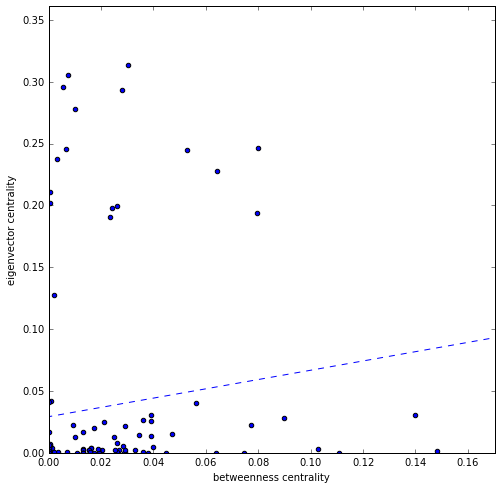

In [55]:
# Open code cell
# Make a (deep) copy of the graph; we work on the copy.
g2 = G.copy()

# Remove the 2 nodes with the highest centrality meaures as discussed above 
g2.remove_node('fa10-01-04')
g2.remove_node('fa10-01-13')

# Recompute the centrality measures.
betweenness2 = nx.betweenness_centrality(g2)
centrality2 = nx.eigenvector_centrality(g2)

# Scatter plot comparison of the recomputed measures.
centrality_scatter(betweenness2, centrality2, 
                   xlab='betweenness centrality',ylab='eigenvector centrality',line=True)

#### 2.3.3 Merge the centrality measures into a single dataframe
You can also use Pandas magic and merge all of the centrality measures that you have computed into a single dataframe. The merge method accepts two dataframes and merges on a column that is common to both dataframes. Below is a repeated call on merge that eventually outputs a single dataframe.

In [56]:
m1 = pd.merge(df_call_btn_centrality_sorted, df_call_clo_centrality_sorted)
m2 = pd.merge(m1, df_call_deg_centrality_sorted)
df_merged  = pd.merge(m2, df_call_eig_centrality_sorted)
df_merged.head()

,participantID,btn.centrality,clo.centrality,deg.centrality,eig.centrality
0,fa10-01-04,0.651025,0.624390,0.523438,0.213067
1,fa10-01-13,0.248733,0.477612,0.328125,0.326465
2,fa10-01-76,0.042644,0.465455,0.046875,0.066289
3,fa10-01-62,0.035216,0.467153,0.070312,0.055543
4,fa10-01-74,0.033967,0.444444,0.109375,0.164926


The above Pandas magic trick is generally quite useful when you are presented with data from different sources, and would like to combine them into a single dataframe using a common column that is shared by the dataframes.

<br>
<div class="alert alert-info">
<b>Exercise 7 [Advanced exercise for bonus marks] Start.</b>
</div>

### Instructions
> 1. Make a copy of the graph G and assign to variable g3.

> 2. Remove the node with highest betweenness centrality measure from g3. 

> 3. Recompute the betweenness and eigenvector centrality measure for g3, and assign the output to the variables betweeness3 and eig_centrality3 respectively.

> 4. Make a scatter plot comparison of the centrality measures computed in the previous step using the centrality_scatter as defined.

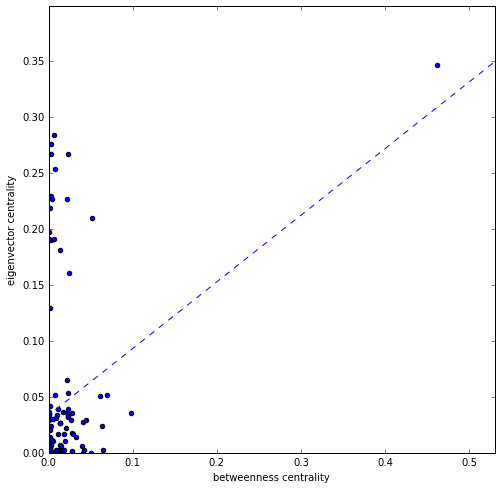

In [59]:
# Make a copy of the graph G and assign to variable g3.
g3 = G.copy()

# Remove the node with highest betweenness centrality measure from g3.
g3.remove_node('fa10-01-04')

# Recompute the betweenness and eigenvector centrality measure for g3, and assign the output to the variables betweeness3 and eig_centrality3 respectively.
betweenness3 = nx.betweenness_centrality(g3)
eig_centrality3 = nx.eigenvector_centrality(g3)

# Make a scatter plot comparison of the centrality measures computed in the previous step using the centrality_scatter as defined.
centrality_scatter(betweenness3, eig_centrality3, 
                   xlab='betweenness centrality',ylab='eigenvector centrality',line=True)

<br>
<div class="alert alert-info">
<b>Exercise 7 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

<br>
<div class="alert alert-info">
<b>Exercise 8 [Advanced exercise for bonus marks] Start.</b>
</div>

### Instructions
> 1. Compute the 4 different centrality measures using the SMS graph object you created earlier.
> 2. Store each result in a dataframe such that the values of the centrality measures are in descending order.
> 3. Merge the separate results into a single dataframe with the following column headers:  ['participantID', 'btn.centrality', 'clo.centrality','deg.centrality', 'eig.centrality']
> 4. Display the top 10 rows of the merged dataframe containing the centrality measures
> 5. Are there any participant IDs that appear in both the top 10 rows of the call and sms centrality dataframe as derived?

In [65]:
# Your code here.
# Add as many cells as you may require below for your solution. 
sms_degree_centrality = nx.degree_centrality(H)
# Arrange in descending order of centrality and return the result as a tuple, i.e. (participant_id, deg_centrality).
t_sms_deg_centrality_sorted = sorted(sms_degree_centrality.iteritems(), key=lambda (k,v) : (-v,k))

# Convert tuple to pandas datatframe.
df_sms_deg_centrality_sorted = pd.DataFrame([[x,y] for (x,y) in t_sms_deg_centrality_sorted], 
                                             columns=['participantID', 'deg.centrality'])

s1 = pd.merge(df_sms_btn_centrality_sorted, df_sms_clo_centrality_sorted)
s2 = pd.merge(s1, df_sms_deg_centrality_sorted)
df_merged_H  = pd.merge(s2, df_sms_eig_centrality_sorted)
df_merged_H.head(10)


,participantID,btn.centrality,clo.centrality,deg.centrality,eig.centrality
0,fa10-01-38,0.109903,0.163619,0.060241,0.014765
1,sp10-01-46,0.108421,0.176205,0.060241,0.111008
2,sp10-01-39,0.053644,0.177916,0.144578,0.346816
3,fa10-01-82,0.044397,0.142057,0.084337,0.002871
4,sp10-01-49,0.043746,0.155299,0.120482,0.302168
5,fa10-01-76,0.031737,0.122169,0.036145,0.038125
6,sp10-01-45,0.027066,0.166594,0.096386,0.253395
7,fa10-01-44,0.026839,0.138828,0.060241,0.002702
8,fa10-01-43,0.023876,0.139888,0.060241,0.002757
9,sp10-01-08,0.022584,0.150207,0.096386,0.256378


In [66]:
df_merged.head(10)

,participantID,btn.centrality,clo.centrality,deg.centrality,eig.centrality
0,fa10-01-04,0.651025,0.624390,0.523438,0.213067
1,fa10-01-13,0.248733,0.477612,0.328125,0.326465
2,fa10-01-76,0.042644,0.465455,0.046875,0.066289
3,fa10-01-62,0.035216,0.467153,0.070312,0.055543
4,fa10-01-74,0.033967,0.444444,0.109375,0.164926
5,fa10-01-18,0.033961,0.463768,0.062500,0.077000
6,fa10-01-70,0.032834,0.326531,0.031250,0.004906
7,sp10-01-23,0.030265,0.426667,0.062500,0.040950
8,fa10-01-55,0.026465,0.408946,0.023438,0.018787
9,sp10-01-45,0.025622,0.475836,0.109375,0.212481


sp10-01-45 and fa10-01-76 appear in both the top 10 rows of the call and sms centrality dataframe as derived.

<br>
<div class="alert alert-info">
<b>Exercise 8 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

### 2.4 Average path length and network diameter

The size of a network can be calculated using two measures. The first measure of network size is simply the average distance within the network, which is equal to the average of the distances between all possible pairs of vertices. The average path length shows, on average, the number of steps it takes to get from one member of the network to another.

The second and alternative network size measure is the diameter, and it is defined as the shortest distance between the two most distant nodes in the network. It is representative of the linear size of a network.To compute the diameter, one looks at all the shortest path distance values between connected edges in the network.

Both are measures of the size of the network and can be understood as the distance between the nodes. Unlike the connectedness centrality measures, which are node-focused, average path length and diameter are global metrics on the structure of the graph. Along with degree distribution and clustering coefficient, average path length provides a robust measure of network topology.

In [67]:
print 'Diameter {}'.format(nx.diameter(G))
print 'Average path length {:0.2f}'.format(nx.average_shortest_path_length(G))

Diameter 7
Average path length 2.71


### 2.5 Clustering coefficient

The clustering coefficient is used to measure the extent to which nodes tend to cluster together. This measure can be understood as the *"friends of my friends are friends"* measure. In most real-world networks, such as social networks, nodes tend to create tightly knit groups characterised by a relatively high density of connections between nodes, and this likelihood tends to be greater than the average probability of a tie randomly established between two nodes. A high clustering coefficient for a network is an indication of a small world, which is a phenomenon in which two strangers often find that they have a friend in common. Human social networks, such as on Facebook, Twitter, or LinkedIn, typically exhibit the feature that in any cluster of friends, each friend is also connected to other friends.

Two common definitions of the clustering coefficient of a graph are commonly used:
- Global clustering
- Average local clustering. 


The **global clustering coefficient** or  **transitivity** was discussed in the video lectures and is a measure designed to give an overall indication of the clustering in the network. It is based on  the concept of *triplets* of nodes. A triplet is three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties. A triangle consists of three closed triplets, one centred on each of the nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). In NetworkX, this measure can be obtained using a method called transitivity as demonstrated below.

In [68]:
print 'The global clustering for our graph G is {0}'.format(nx.transitivity(G))

The global clustering for our graph G is 0.290989399293


Watts and Strogatz (1998) proposed another clustering definition which is referred to as the **local clustering coefficient**. More detail can be found in the caption of Figure 2 of their freely available [paper](http://www.stevenstrogatz.com/articles/collective-dynamics-of-small-world-networks-pdf). The local gives an indication of the embeddedness of single nodes or how concentrated the neighborhood of that vertex is. It is given by the ratio of the number of actual edges there are between neighbors to the number of potential edges there are between neighbors. The clustering coefficient of a network is then given as the average of the vertex clustering coefficients. 

We illustrate the intuition behind the local clustering coefficient below by considering the following network.

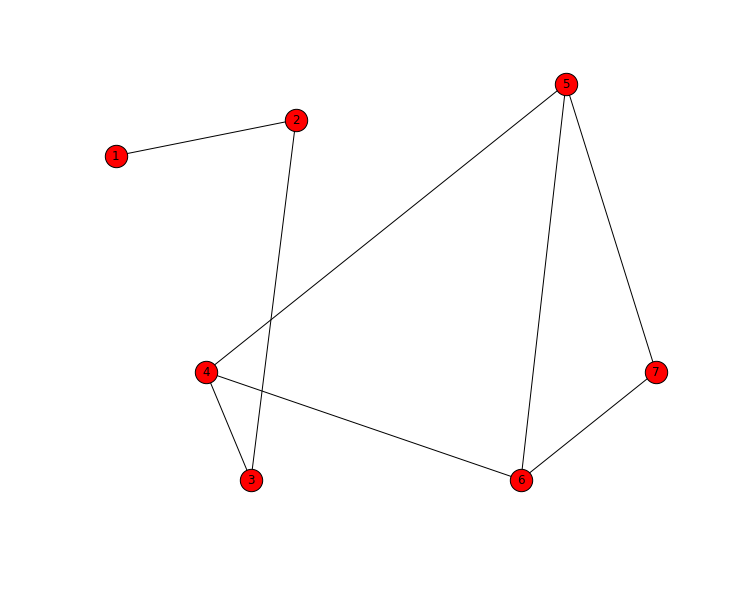

In [69]:
# Create a graph object from an edges list and visualize the graph. 
# For reproducibility, we fix positions of the nodes in the drawing.
e = [(1,2), (2,3), (3,4), (4,5), (4,6), (5,6), (5,7), (6,7)]
g =  nx.Graph()
g.add_edges_from(e)
fixed_positions = {1:(-1,3), 2:(1,3.5), 3:(0.5,-1.5), 4:(0,0),5:(4,4), 6:(3.5,-1.5), 7:(5,0)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(g,pos=fixed_positions, fixed = fixed_nodes)
nx.draw(g, pos=pos, with_labels=True, node_size=500)

Choosing node 5 as the node of interest let's calculate its clustering coefficient - how concentrated its neighborhood is.

In [70]:
# Number of edges there are between neigbors of 5. 
actual_edges = len([(4,5), (6,7)])

# Total possible edges between neighbors of 5.
total_possible_edges = len([(4,5), (6,7), (4,7)])

# Clustering coeff of node. 
local_clustering_coef  = 1.0 * actual_edges / total_possible_edges

print local_clustering_coef

0.666666666667


NetworkX contains a method for calculating the clustering coefficient for all the nodes in a graph. You can specify a list of nodes as an argument when calling the method on a graph.

In [71]:
# Local clustering for node 5
print nx.clustering(g, nodes=[5]).values()[0]

0.666666666667


Do all nodes in a network or graph have the same local clustering coefficient? To get the clustering coefficients for all the nodes, simply call the method without specifying the nodes argument.

In [72]:
nx.clustering(g)

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.3333333333333333,
 5: 0.6666666666666666,
 6: 0.6666666666666666,
 7: 1.0}

> **Note** 

> The clustering coefficient is defined as zero when there are less than two neighbors in a vertex's neighborhood.

When applied to a single node, the clustering coefficient is a measure of how complete its neighborhood is . When applied to an entire network, it is the average clustering coefficient over all of the nodes in the network. Again, you can also compute this using NetworkX.

In [73]:
# Compute average clustering coefficient for our graph g directly.
print '(Direct) The average local clustering coefficient of the network is {:0.3f}'.format(np.mean(nx.clustering(g).values()))

# Or using NetworkX.
print '(NetworkX) The average local clustering coefficient of the network is {:0.3f}'.format(nx.average_clustering(g))

(Direct) The average local clustering coefficient of the network is 0.381
(NetworkX) The average local clustering coefficient of the network is 0.381


With this background, you can calculate the average clustering coefficient of the call data network from above.

> **Note**:

> On the network level there are two versions of clustering coefficient. The first one is the global clustering coefficient that we computed at the top of section 2.5 and as was dicussed in video content by Xiaowen Dong. The second one is the average of local clustering coefficient of all the nodes in the network.

In most cases, nodes with a degree below a certain threshold are of little or no interest. For visualization purposes in particular, very dense nodes are computationally costly and do not render very well when all of the nodes are included. Hence, you may want to exclude these from further analysis.

The next section will investigate the effect of removing nodes with a degree of 1 on the clustering coefficient.

> **Note to non-technical Students:**

> You do not need to understand the function and its syntax. It is included for advanced users and to make it possible to demonstrate the concepts in this section to you more easily. All you need to do **execute the cell below**.

In [74]:
# Define a function that trims.
def trim_degrees(g, degree=1):
    """
    Trim the graph by removing nodes with degree less than or equal to the value of the degree parameter
    Returns a copy of the graph.
    """
    g2=g.copy()
    d=nx.degree(g2)
    for n in g2.nodes():
        if d[n]<=degree: g2.remove_node(n)
    return g2

In [75]:
# Effect of removing weakly connected nodes.
G1 = trim_degrees(G, degree=1)
G3 = trim_degrees(G, degree=3)
G5 = trim_degrees(G, degree=5)

# Compare the clustering coefficient of the resulting network objects.
(round(nx.average_clustering(G),3), round(nx.average_clustering(G1),3), round(nx.average_clustering(G3),3),
round(nx.average_clustering(G5),3))

(0.43, 0.486, 0.541, 0.612)

<br>
<div class="alert alert-info">
<b>Exercise 9 [Advanced exercise for bonus marks] Start.</b>
</div>

### Instructions

> From the above results where nodes with lower degrees where removed, what can we observe on the effect on the average clustering coefficient when these nodes are removed from the graph or network object?

Your markdown answer: Effect on clustering coefficient as nodes with lower degree are removed from the graph. 

The average clustering coefficient increases when lower degrees nodes are removed from the graph or network object.

<br>
<div class="alert alert-info">
<b>Exercise 9 End.</b> 
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 3 Small-World Networks

Networks incorporating the two characteristics of a high clustering coefficient $C(p)$ and a low mean shortest path or characteristic path length $L(p)$ (but higher than a random network), i.e.

\begin{equation}
                       C(p) >> C_{random} \hspace{0.5cm}and\hspace{0.5cm} L(p) \gtrsim  L_{random}
\end{equation}

are known as **small-world networks**. The name comes from the so-called "*small world*" phenomenon in which two strangers often find that they have a friend in common. Human social networks typically exhibit the feature that in any cluster of friends, each friend is also connected to other clusters. Consequently, it usually takes only a short string of acquaintances to connect any two people on earth.

<br>
<div class="alert alert-info">
<b>Exercise 10 Start.</b>
</div>

### Instructions

> What are the two criteria typically used in identifying a network as a small world network? 

Type your answers in the markdown cell below.

Your markdown answer.

1. a high clustering coefficient C(p)
2. a low mean shortest path or characteristic path length L(p)

<br>
<div class="alert alert-info">
<b>Exercise 10 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

Consider the following data for three different real-world networks [4]. 
The first system is a collaboration graph of feature film actors, 
the second one is the electrical power grid of the western United States,
and the third is the neural network of the nematode worm *Caenorhabditis elegans* (*C.elegans*).The graph of film actors is a surrogate for a social network, with the advantage of being much more easily specified. The graph of the power grid is relevant to the efficiency and robustness of power networks. And C. elegans is the sole example of a completely mapped neural network. The graphs are defined as follows: Two actors are joined by an edge if they have acted in a film together. For the power grid, vertices represent generators, transformers and substations, and edges represent high-voltage transmission lines between them. For C. elegans, an edge joins two neurons if they are connected by either a synapse or a gap function. We reproduce the characteristic path lengths and clustering coefficients for the three networks in the dataframe, and provide the published comparison to random graphs (for the same number of vertices and average number of edges per vertex).

In [76]:
#reproduce the table from [4]
tbl = pd.DataFrame(np.transpose(np.array([[3.65, 18.7, 2.65],
                                          [2.99, 12.4, 2.25],
                                          [0.79, 0.080, 0.28],
                                          [0.00027, 0.005, 0.05]])),
             index=['Film actors', 'Power grid', 'C.elegans'],
            columns = ['L.actual','L.random','C.actual','C.random'])
tbl

,L.actual,L.random,C.actual,C.random
Film actors,3.65,2.99,0.79,0.00027
Power grid,18.70,12.40,0.08,0.00500
C.elegans,2.65,2.25,0.28,0.05000


Next, we extend the table stucture from above by adding two columns of **Boolean** type that give the results of comparing L.actual to L.random and C.actual to C.random.

In [77]:
#compare 'L.actual' to 'L.random' to return a Boolean based on the above
tbl['L.actual gt L.random'] = tbl['L.actual'] > tbl['L.random']
tbl

,L.actual,L.random,C.actual,C.random,L.actual gt L.random
Film actors,3.65,2.99,0.79,0.00027,True
Power grid,18.70,12.40,0.08,0.00500,True
C.elegans,2.65,2.25,0.28,0.05000,True


Next we compare 'C.actual' to 'C.random' to again return a Boolean value.

In [78]:
# Complete this cell based on the supplied example.
tbl['C.actual gt C.random'] = tbl['C.actual'] > tbl['C.random']
tbl

,L.actual,L.random,C.actual,C.random,L.actual gt L.random,C.actual gt C.random
Film actors,3.65,2.99,0.79,0.00027,True,True
Power grid,18.70,12.40,0.08,0.00500,True,True
C.elegans,2.65,2.25,0.28,0.05000,True,True


<br>
<div class="alert alert-info">
<b>Exercise 11 Start.</b>
</div>

### Instructions

> Based on the above computations, and recalling the definition of a small-world network in the introduction to Section 3 of this notebook, list below which of the three networks (Film actors, Power grid, and C.elegans) exhibits small-world phenomena.

Film actors exhibits small-world phenomena because it has a low mean shortest path L and a high clustering coefficient C.

<br>
<div class="alert alert-info">
<b>Exercise 11 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 4. Saving and cleaning Up 

Save your network data for future use - in this case, the next exercise. Conveniently NetworkX provides methods which, combined with Pandas magic, enable you to save the adjacency matrix.

In [79]:
# Create the adjacency matrix for call records using NetworkX and Pandas functions.
G = G.to_undirected()
nodes = G.nodes()
call_adjmatrix = nx.adjacency_matrix(G)
call_adjmatrix= pd.DataFrame(call_adjmatrix.toarray(), columns=nodes, index=nodes) 

# Save the matrix for future use.
call_adjmatrix.to_csv('./call.adjmatrix')

<br>
<div class="alert alert-info">
<b>Exercise 12 [Advanced exercise - Not graded] Start.</b>
</div>

### Instructions

> Students who completed the SMS example will also need to save their results from the SMS dataframes. Make sure to check the variables used below carefully to ensure that you update to reflect the variable names you used to save your results. 

In [80]:
# Create the adjacency matrix for SMS records using NetworkX and Pandas functions.
H = H.to_undirected()
nodes_h = H.nodes()
sms_adjmatrix = nx.adjacency_matrix(H)
sms_adjmatrix= pd.DataFrame(sms_adjmatrix.toarray(), columns=nodes_h, index=nodes_h) 

# Save the matrix for future use.
sms_adjmatrix.to_csv('./sms.adjmatrix')

<br>
<div class="alert alert-info">
<b>Exercise 12 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

### References

1. Zipf, George Kingsley. 1949. Human behavior and the principle of least effort: An introduction to human ecology. Reading: Addison-Wesley Press.
2. Blondel, Vincent D.; Decuyper, Adeline; and Krings, Gautier. 2015. “A survey of results on mobile phone datasets analysis.” EPJ Data Science 2015; 4. DOI:10.1140/epjds/s13688-015-0046-0.
3. Krings, Gautier. 2012. “Extraction of information from large networks.” PhD thesis, Université catholique de Louvain.
4. Watts, Duncan J.; and Strogatz, Steven H. 1998. “Collective dynamics of "small-world" networks.” Nature 393:440-442. DOI:10.1038/30918.

## 5. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb)"; and
- Submit a copy of this file to the online campus.